In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt


C:\Users\vkhosla\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\vkhosla\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [20]:
pip install wquantiles

Note: you may need to restart the kernel to use updated packages.


In [7]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [8]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

In [22]:
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/state.csv'
state = pd.read_csv(url)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [18]:
state.shape

(50, 4)

# Measures of Location

In [23]:
#mean,median,weighted mean,weighted median,trim_mean
print(f"median:{state['Population'].median()}")
print(state['Population'].mean())
print(trim_mean(state['Population'],0.1))
print(f"wmean:{np.average(state['Murder.Rate'],weights =state['Population'])}")
wquantiles.median(state['Murder.Rate'],weights=state['Population'])

median:4436369.5
6162876.3
4783697.125
wmean:4.445833981123393


4.4

# Measures of Variability

In [30]:
print(f"standard deviation:{state['Population'].std()}")
print(f"variance:{state['Population'].var()}")
print(f"IQR:{state['Population'].quantile(0.75) - state['Population'].quantile(0.25)}")
robust.scale.mad(state['Population'])

standard deviation:6848235.347401142
variance:46898327373394.445
IQR:4847308.0


3849876.1459979336

# Plots

In [4]:
#box plot
state['Murder.Rate'].quantile([0.05,0.1,0.25,0.5,0.75,0.9,0.99])

0.05    1.600
0.10    1.890
0.25    2.425
0.50    4.000
0.75    5.550
0.90    6.010
0.99    9.467
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population(MM)')

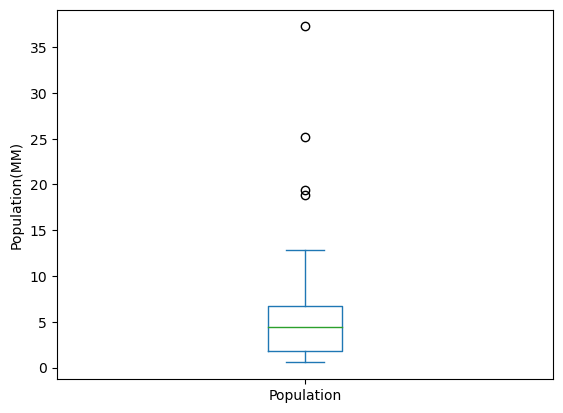

In [8]:
#box plot
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population(MM)')

In [25]:
#freq table
binpop = pd.cut(state['Population'],10)
binpop

0       (4232659.0, 7901692.0]
1       (526935.67, 4232659.0]
2       (4232659.0, 7901692.0]
3       (526935.67, 4232659.0]
4     (33584923.0, 37253956.0]
5       (4232659.0, 7901692.0]
6       (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
8     (15239758.0, 18908791.0]
9      (7901692.0, 11570725.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
12    (11570725.0, 15239758.0]
13      (4232659.0, 7901692.0]
14      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
18      (526935.67, 4232659.0]
19      (4232659.0, 7901692.0]
20      (4232659.0, 7901692.0]
21     (7901692.0, 11570725.0]
22      (4232659.0, 7901692.0]
23      (526935.67, 4232659.0]
24      (4232659.0, 7901692.0]
25      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
29     (7901692.0, 11570725.0]
30      (526935.67, 4232659.0]
31    (18908791.0, 22577824.0]
32     (

In [24]:
binpop.name = 'binnedPopulation'
df = pd.concat([state, binpop], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation', observed=False):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

In [26]:
df

,State,Population,Murder.Rate,Abbreviation,binnedPopulation
49,Wyoming,563626,2.7,WY,"(526935.67, 4232659.0]"
44,Vermont,625741,1.6,VT,"(526935.67, 4232659.0]"
33,North Dakota,672591,3.0,ND,"(526935.67, 4232659.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
40,South Dakota,814180,2.3,SD,"(526935.67, 4232659.0]"
7,Delaware,897934,5.8,DE,"(526935.67, 4232659.0]"
25,Montana,989415,3.6,MT,"(526935.67, 4232659.0]"
38,Rhode Island,1052567,2.4,RI,"(526935.67, 4232659.0]"
28,New Hampshire,1316470,0.9,NH,"(526935.67, 4232659.0]"
18,Maine,1328361,1.6,ME,"(526935.67, 4232659.0]"


Text(0.5, 0, 'Population')

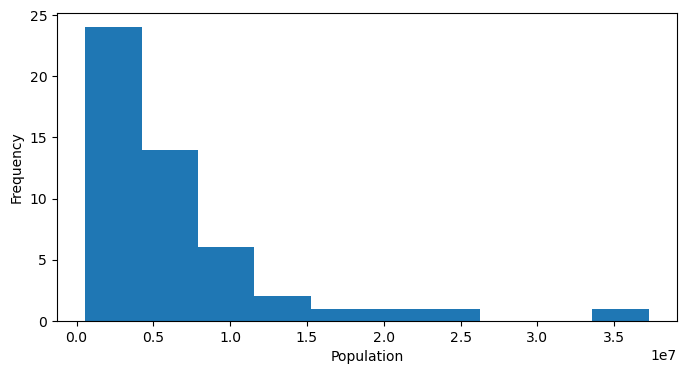

In [18]:
#histogram
ax = (state['Population']).plot.hist(figsize=(8,4))
ax.set_xlabel('Population')

Text(0.5, 0, 'Rate')

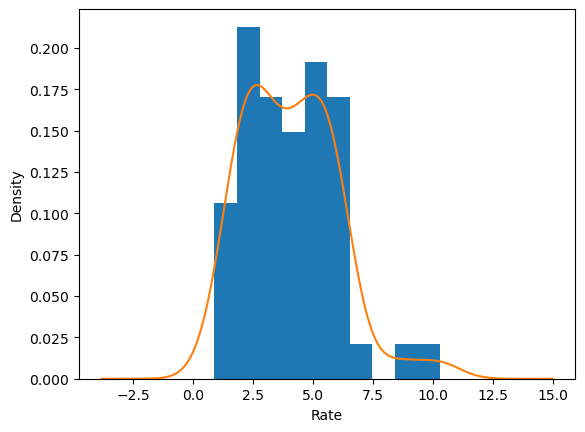

In [23]:
#kde and histogram
ax = state['Murder.Rate'].plot.hist(density=True)
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Rate')

In [5]:
#airport delay data
url ='https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/dfw_airline.csv'
delaydata = pd.read_csv(url)
delaydata

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [13]:
100*delaydata/delaydata.values.sum()

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


Text(0, 0.5, 'Count')

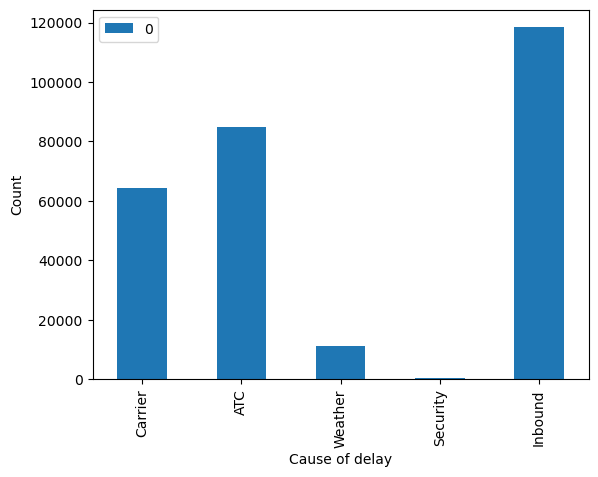

In [20]:
ax = delaydata.transpose().plot.bar()
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [34]:
#correlation
url ='https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/sp500_sectors.csv'
sp500_sectors = pd.read_csv(url)


sector                  sector_label             sub_sector                           symbol
consumer_discretionary  Consumer\nDiscretionary  advertising                          IPG       1
                                                                                      OMC       1
                                                 apparel,_accessories_&_luxury_goods  COH       1
                                                                                      FOSL      1
                                                                                      HBI       1
                                                                                               ..
utilities               Utilities                multiutilities                       PCG       1
                                                                                      PNW       1
                                                                                      SCG       1
                         

In [46]:
sp500_sectors.agg(['count', 'size', 'nunique'])
print (sp500_sectors['sector'].unique())

['information_technology' 'industrials' 'energy' 'consumer_discretionary'
 'utilities' 'materials' 'etf' 'telecommunications_services'
 'consumer_staples' 'financials' 'health_care']


In [31]:
sp_500data = pd.read_csv(r'downloads/sp500_data.csv.gz', compression='gzip', header=0,index_col=0)
sp_500data.info()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


In [33]:
sp_500data.describe()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
count,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,...,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000
mean,0.041273,0.003379,0.003065,-0.032918,0.003007,0.013891,0.000586,0.050163,-0.000881,-0.000694,...,0.018307,0.005434,-0.012175,-0.001181,0.012839,0.005226,-0.003724,0.015399,0.011133,0.022780
std,1.291017,0.580829,0.359792,1.076244,0.316781,0.875912,0.743526,1.202898,0.346036,0.668376,...,0.946297,1.161781,1.024801,0.040555,2.084182,0.558498,0.478073,2.376597,1.204722,0.621497
min,-11.240005,-6.612527,-2.076718,-13.500000,-2.785000,-19.859698,-8.372804,-8.993271,-3.263346,-6.189851,...,-10.500000,-15.060013,-7.315023,-1.710001,-36.470001,-6.819999,-5.300798,-20.490021,-9.187500,-4.690003
25%,-0.130001,-0.217653,-0.143606,-0.189999,-0.058120,-0.346870,-0.134952,-0.475817,-0.119237,-0.239486,...,-0.290001,-0.122500,-0.351788,0.000000,-0.410000,-0.092500,-0.077838,-0.379999,-0.389999,-0.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023545,0.000000,-0.007096,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.200003,0.225176,0.146588,0.150000,0.067815,0.372219,0.154232,0.568174,0.128171,0.227150,...,0.320000,0.117500,0.370305,0.000000,0.479999,0.098750,0.084384,0.375000,0.375000,0.305000
max,20.039993,4.752754,3.490654,18.781250,1.994999,8.048167,13.974327,8.802359,3.475058,9.620642,...,6.879997,15.470001,7.519540,0.550004,18.820007,4.459999,4.892281,30.710022,11.937500,7.349999


In [61]:

telecomSymbols = sp500_sectors[sp500_sectors['sector'] == 'telecommunications_services']['symbol']
telecomSymbols



332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [62]:
# Filter data for dates July 2012 through June 2015
telecom = sp_500data.loc[sp_500data.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


In [70]:
etf = sp500_sectors[sp500_sectors['sector']=='etf']['symbol']
etf

315    XLI
316    QQQ
317    SPY
318    DIA
319    GLD
320    VXX
321    USO
322    IWM
323    XLE
324    XLY
325    XLU
326    XLB
327    XTL
328    XLV
329    XLP
330    XLF
331    XLK
Name: symbol, dtype: object

In [75]:
etfcorr = sp_500data.loc[sp_500data.index > '2012-07-01',etf]

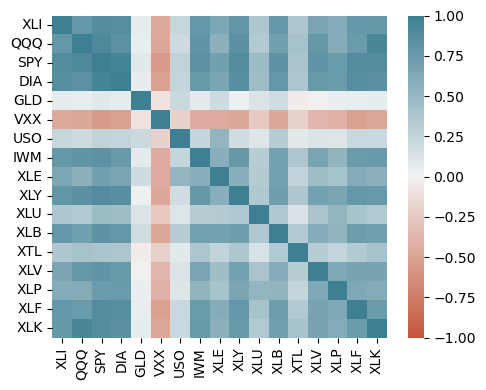

In [81]:
fig, ax = plt.subplots(figsize=(5, 4))

ax = sns.heatmap(etfcorr.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

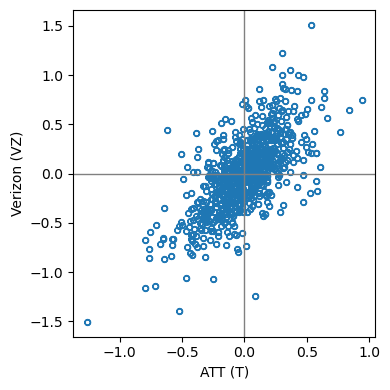

In [82]:
#scatter plot of correlations
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

In [83]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

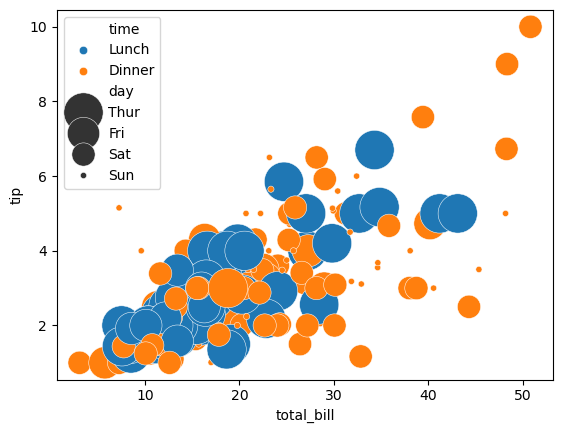

In [96]:
sns.scatterplot(data=tips, x="total_bill", y="tip",hue='time',size="day",sizes = (20,800))

In [11]:
#multivariables
tax = pd.read_csv(r'downloads/kc_tax.csv.gz',compression ='gzip')
tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [12]:
tax0 = tax.loc[(tax.SqFtTotLiving>100) & (tax.SqFtTotLiving<3500) & (tax.TaxAssessedValue< 750000),:]
tax0


,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


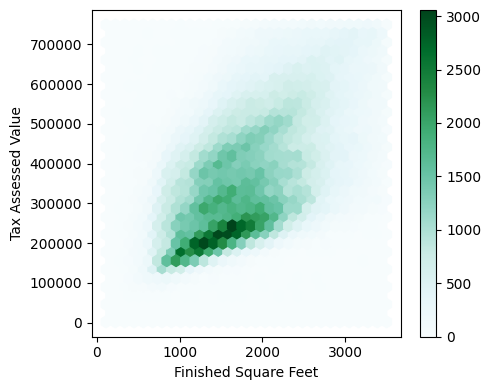

In [8]:

ax = tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

In [1]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.9.4


In [112]:
pip install --upgrade matplotlib --user


  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
Note: you may need to restart the kernel to use updated packages.


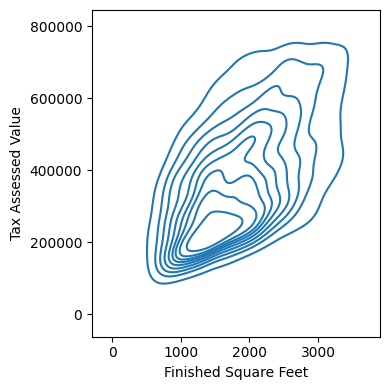

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

In [14]:
loans = pd.read_csv(r'downloads/lc_loans.csv')
loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [20]:
loans['status'].groupby(loans["grade"]).value_counts()

grade  status     
A      Current        50051
       Fully Paid     20408
       Charged Off     1562
       Late             469
B      Current        93852
       Fully Paid     31160
       Charged Off     5302
       Late            2056
C      Current        88928
       Fully Paid     23147
       Charged Off     6023
       Late            2777
D      Current        53281
       Fully Paid     13681
       Charged Off     5007
       Late            2308
E      Current        24639
       Fully Paid      5949
       Charged Off     2842
       Late            1374
F      Current         8444
       Fully Paid      2328
       Charged Off     1526
       Late             606
G      Current         1990
       Fully Paid       643
       Charged Off      409
       Late             199
Name: count, dtype: int64

In [22]:
crosstab = loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [23]:
df = crosstab.copy().loc['A':'G',:].astype(float)
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


In [24]:
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/airline_stats.csv'
airline_stats = pd.read_csv(url)
airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


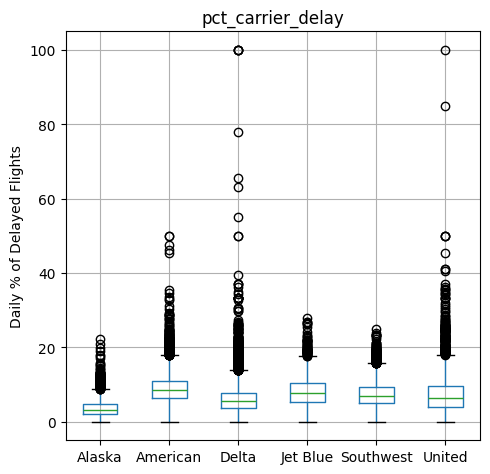

In [26]:
ax = airline_stats.boxplot(by = 'airline',column = 'pct_carrier_delay',figsize=(5, 5))

ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

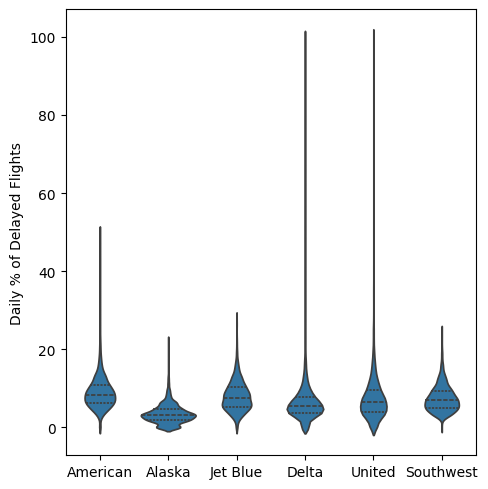

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

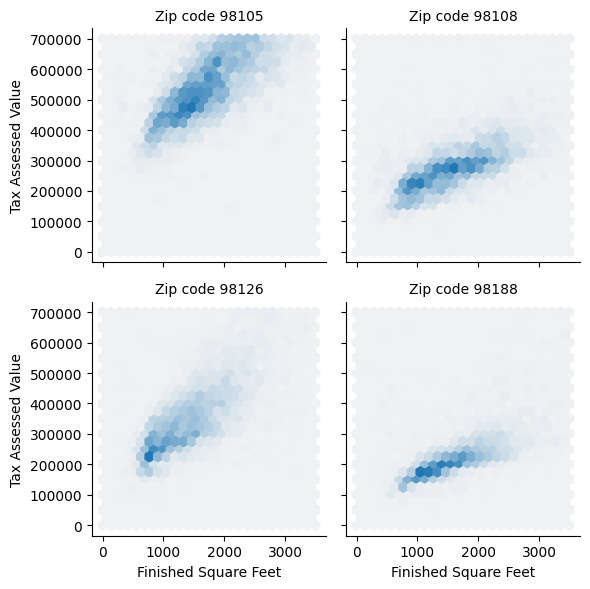

In [28]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = tax0.loc[tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()